In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [2]:
# store file path
csv_data = "/Users/Jackson/Downloads/archive/User0_credit_card_transactions.csv"

# read file
credit_card_df = pd.read_csv(csv_data)

# print head
credit_card_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [4]:
# drop columns
credit_card_df = credit_card_df.drop(columns=['User', 'Card', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?'])

credit_card_df.head()

,Year,Month
0,2002,9
1,2002,9
2,2002,9
3,2002,9
4,2002,9


In [5]:
# Sort data by month
credit_card_df.sort_values(by='Month')

,Year,Month
7551,2008,1
1624,2007,1
1623,2007,1
1622,2007,1
1621,2007,1
...,...,...
1046,2004,12
1047,2004,12
1048,2004,12
1034,2004,12


In [6]:
# Find amount of transactions per month
January_data = credit_card_df["Month"].value_counts()[1]
January_data
print("January Transactions: " + str(January_data))

February_data = credit_card_df["Month"].value_counts()[2]
February_data
print("February Transactions: " + str(February_data))

March_data = credit_card_df["Month"].value_counts()[3]
March_data
print("March Transactions: " + str(March_data))

April_data = credit_card_df["Month"].value_counts()[4]
April_data
print("April Transactions: " + str(April_data))

May_data = credit_card_df["Month"].value_counts()[5]
May_data
print("May Transactions: " + str(May_data))

June_data = credit_card_df["Month"].value_counts()[6]
June_data
print("June Transactions: " + str(June_data))

July_data = credit_card_df["Month"].value_counts()[7]
July_data
print("July Transactions: " + str(July_data))

August_data = credit_card_df["Month"].value_counts()[8]
August_data
print("August Transactions: " + str(August_data))

September_data = credit_card_df["Month"].value_counts()[9]
September_data
print("September Transactions: " + str(September_data))

October_data = credit_card_df["Month"].value_counts()[10]
October_data
print("October Transactions: " + str(October_data))

November_data = credit_card_df["Month"].value_counts()[11]
November_data
print("November Transactions: " + str(November_data))

December_data = credit_card_df["Month"].value_counts()[12]
December_data
print("December Transactions: " + str(December_data))

January Transactions: 1790
February Transactions: 1470
March Transactions: 1699
April Transactions: 1545
May Transactions: 1651
June Transactions: 1589
July Transactions: 1675
August Transactions: 1626
September Transactions: 1728
October Transactions: 1771
November Transactions: 1700
December Transactions: 1719


In [7]:
# make a data set
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
Transactions = [1790, 1470, 1699, 1545, 1651, 1589, 1675, 1626, 1728, 1771, 1700, 1719]
Color = ["blue", "blue", "yellow", "yellow", "yellow", "red", "red", "red", "brown", "brown", "brown", "blue"]

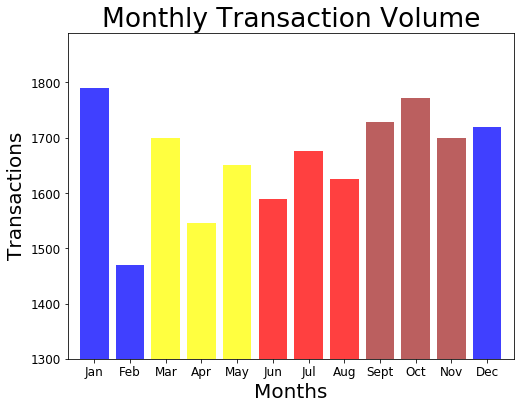

In [46]:
# Generate bar plot

plt.title("Monthly Transaction Volume")
plt.xlabel("Months")
plt.ylabel("Transactions")

plt.xlim(-.75, len(Months)-.25)
plt.ylim(1300, max(Transactions) + 100)

plt.bar(Months, Transactions, color = Color, alpha=.75, align="center")

# increase size of the figure
plt.rcParams["figure.figsize"] = (8,6)

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# save figure
plt.savefig("fig1_user0.png")

plt.show()

In [10]:
# Checking the number of years in the DataFrame.
year_count = credit_card_df["Year"].nunique()
year_count

19

In [11]:
# make dataframe of ascending years
year_data_df = credit_card_df.sort_values(by='Year', ascending=True)
year_data_df

,Year,Month
0,2002,9
223,2002,11
222,2002,11
221,2002,11
220,2002,11
...,...,...
10545,2020,2
6180,2020,1
6181,2020,1
6183,2020,1


In [12]:
# print column names in dataframe
print(year_data_df.columns.values.tolist())

['Year', 'Month']


In [13]:
year_volume = year_data_df['Year'].value_counts()
year_volume

2018    1190
2014    1183
2015    1182
2017    1180
2004    1176
2012    1169
2019    1164
2008    1163
2013    1139
2005    1127
2010    1123
2006    1120
2009    1119
2016    1119
2011    1113
2007    1111
2003    1074
2002     329
2020     182
Name: Year, dtype: int64

In [18]:
# find total transaction volume per year
year_volume_df = year_data_df.groupby('Year').count()
year_volume_df.rename(columns={"Month": "Transaction Volume"}, inplace=True)
year_volume_df.columns
year_volume_df

,Transaction Volume
Year,
2002,329
2003,1074
2004,1176
2005,1127
2006,1120
2007,1111
2008,1163
2009,1119
2010,1123


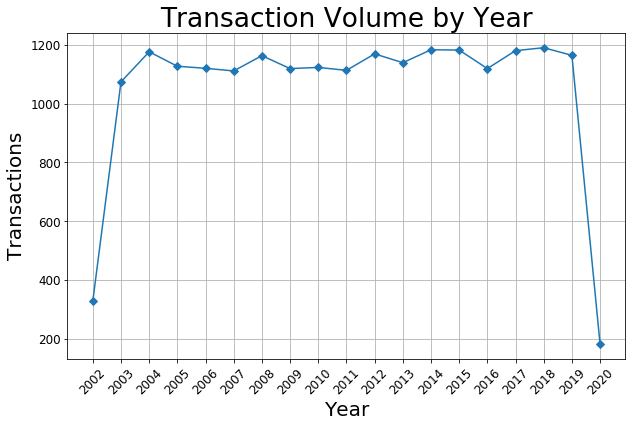

In [74]:
# create dataframe
final_df = pd.DataFrame(
   {
      "Year": ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
              '2015', '2016', '2017', '2018', '2019', '2020'], 
       "Transaction Volume": [329, 1074, 1176, 1127, 1120, 1111, 1163, 1119, 1123, 1113, 1169, 1139, 1183, 1182, 1119, 
                             1180, 1190, 1164, 182]
   }
)

# plot line graph with markers
plt.plot(final_df["Year"], final_df["Transaction Volume"], marker='D')

# create labels
plt.title("Transaction Volume by Year")
plt.xlabel('Year')
plt.ylabel('Transactions')

# add grid
plt.grid()

# increase size of the figure
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(rotation = 45)

# save figure
plt.savefig("Fig2_user0.png")

plt.show()


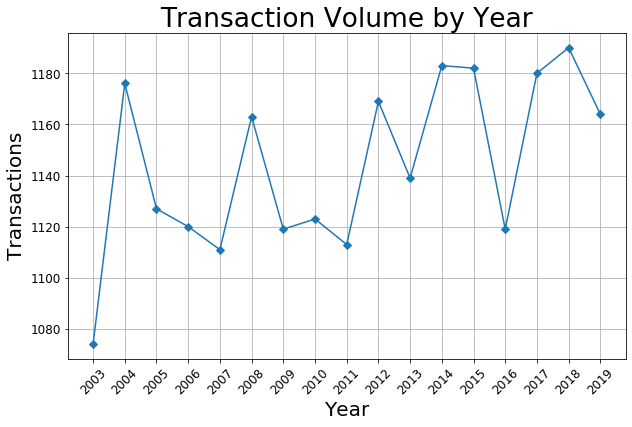

In [76]:
alternate_df = pd.DataFrame(
   {
      "Year": ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
              '2015', '2016', '2017', '2018', '2019'], 
       "Transaction Volume": [1074, 1176, 1127, 1120, 1111, 1163, 1119, 1123, 1113, 1169, 1139, 1183, 1182, 1119, 
                             1180, 1190, 1164]
   }
)

# plot line graph with markers
plt.plot(alternate_df["Year"], alternate_df["Transaction Volume"], marker='D')

# create labels
plt.title("Transaction Volume by Year")
plt.xlabel('Year')
plt.ylabel('Transactions')

# add grid
plt.grid()

# increase size of the figure
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(rotation = 45)

# save figure
plt.savefig("Fig3_user0.png")

plt.show()